In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
mpg = data('mpg')

In [3]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [4]:
mpg.drv.nunique()

3

In [11]:
mpg[mpg.manufacturer == 'toyota'].head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
174,toyota,4runner 4wd,2.7,1999,4,manual(m5),4,15,20,r,suv
175,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
176,toyota,4runner 4wd,3.4,1999,6,auto(l4),4,15,19,r,suv
177,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
178,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv


Math
vectorized operations

In [16]:
mpg.hwy / mpg.displ

1      16.111111
2      16.111111
3      15.500000
4      15.000000
5       9.285714
         ...    
230    14.000000
231    14.500000
232     9.285714
233     9.285714
234     7.222222
Length: 234, dtype: float64

Groupby


In [20]:
mpg.groupby('manufacturer').hwy.mean()

manufacturer
audi          26.444444
chevrolet     21.894737
dodge         17.945946
ford          19.360000
honda         32.555556
hyundai       26.857143
jeep          17.625000
land rover    16.500000
lincoln       17.000000
mercury       18.000000
nissan        24.615385
pontiac       26.400000
subaru        25.571429
toyota        24.911765
volkswagen    29.222222
Name: hwy, dtype: float64

Columns


In [25]:
mpg.rename(columns= {'cty': 'city',
                     'displ':'displacement',
                     'cyl': 'cylinder'})

# mpg =  to assign the changes permanently 

,manufacturer,model,displacement,year,cylinder,trans,drv,city,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [28]:
mpg.drop( columns= ['displacement', 'cylinder'])

KeyError: "['displacement', 'cylinder'] not found in axis"

In [29]:
mpg.assign(displacement = mpg.hwy - mpg.cty)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,displacement
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


Text(0.5, 0, 'MPG H')

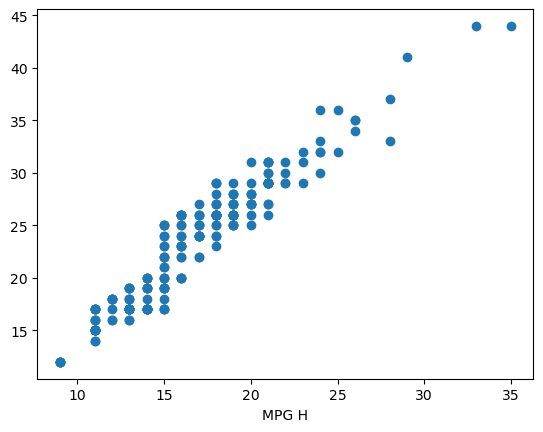

In [34]:
plt.scatter(mpg.cty, mpg.hwy)
plt.xlabel('MPG H')


(array([17., 48., 26., 27., 61., 40.,  7.,  5.,  0.,  3.]),
 array([12. , 15.2, 18.4, 21.6, 24.8, 28. , 31.2, 34.4, 37.6, 40.8, 44. ]),
 <BarContainer object of 10 artists>)

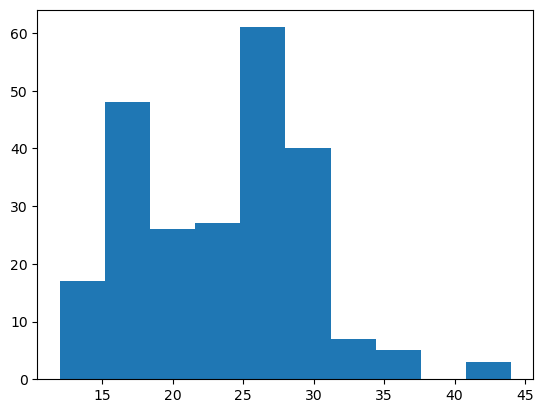

In [35]:
plt.hist(mpg.hwy)

In [37]:
mpg.groupby('drv').hwy.mean()

drv
4    19.174757
f    28.160377
r    21.000000
Name: hwy, dtype: float64